<a href="https://colab.research.google.com/github/marypthomas/ai-bootcamp-osu/blob/main/Session_3/Copy_of_AIBootcamp_Workflows4UnstructuredText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COPY OF Use Case: Workflows for Unstructured Text**

**Authors**:
- Dr. Chaitanya Kulkarni, Meta Inc.
- Dr. Jany Chan, The Ohio State University
- Prof. Raghu Machiraju, The Ohio State University















## Objectives
This notebook will help you 
- learn how to work with text data
- learn how to ingest, compute estimates, and transform text
- learn how to visualize text with word clouds
- learn how to gain insights.

``pandas`` provides a staple backbone for the workflow for processing unstructured text.

## Getting Insights from Unstructured Text: Word Clouds

A word cloud shows all the words in a collection placed in such a way that the frequently occurring words appear prominent (large, colorful, etc.). Word clouds can help identify trends and patterns that would otherwise be unclear or difficult to see in a tabular format. Visit https://en.wikipedia.org/wiki/Tag_cloud for detailed explanation.



## Example: Movie Databases

**Dataset:** [Wiki-Movie-Plots](https://drive.google.com/file/d/1bTjJ15yoICZjVZRTSQOn-oaVbNsmrpe-/view?usp=sharing)

We will use this data set to learn topics what movies focussed on in the early 1900s. We will find the frequently occuring words and visualize them as word clouds. 

Let us make use of the following Python package *WordCloud*, [pyPI](https://cnn.edu),[github](https://cnn.org), [docs](https://cnn.net) to do all the heavy lifting need for visualizing text. After ingesting the data.

In [ ]:
import pandas as pd
movie_df = pd.read_csv("./sample_data/wiki_movie.csv", quoting=2)
movie_df.head()

FileNotFoundError: ignored

In [ ]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 


# Make use of this function to plot a word cloud 
# The input is a frequency dictionary containing the frequency 
# of every word found in the text. The key's are the words, 
# and the values are the counts.

# with the following format:
# freq_dict = {
#    'word1' : 500 # total no of word1 found in text.
#    'word2' : 200 # total no of word2 found in text
#    ...
#    ...
#}
def plot_word_cloud(freq_dict):
  wc = WordCloud(background_color="black")
  wc.generate_from_frequencies(freq_dict)
  plt.figure(figsize=(10,10))
  plt.imshow(wc, interpolation="bilinear")
  plt.axis("off")
  plt.show()


## Generating the Frequency Dictionary

Note, we keep track of each word as we see them in the text. We start with an empty dictionary and depending on which word we see, we will increment that word's count in the dictionary.

In [ ]:
import itertools as it

text = movie_df['Plot'][(movie_df ['Release Year']>1930) & (movie_df['Release Year'] < 1960)].values.tolist()
# text is list of plots. 

# We want to break this into words.
text = [plot.split(" ") for plot in text]
# text is now a list of list of words.

# we want a single list of words
text = list(it.chain.from_iterable(text))


In [ ]:
# start with an empty dictionary.
freq_dict = {}

# here text is a list of all words.
for word in text:
  if word not in freq_dict:
    freq_dict[word] = 0

  freq_dict[word] += 1


## Draw the word cloud
What was done earlier was to create the frequency count and hence implicitly the underlying distribution. Now, we need to plot the "word cloud".

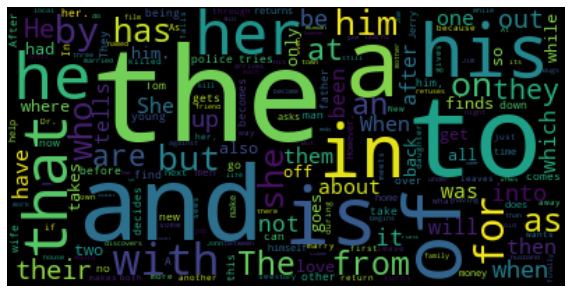

In [ ]:
%matplotlib inline
plot_word_cloud(freq_dict)

## Noise in Unstructured Text 
Some nuances to think of:
- It appears that the most common words found in any typical language (incl.English) discourse (words like "the", "and" ) are also most frequent here.
 These are uninteresting. 
- Such words are called as "stop words" and must be removed to get a more interesting plot of the most frequent words used in describing movie plots.  

## Denoising Text

We will use `nltk` ([docs](https://www.nltk.org/)), a general-purpose library  for tokenization and general text processing needs. Here you will tokenize and extract frequency counts. Make sure to also remove stop words. These frequently occur in English and include articles of speech, tense, etc. (e.g., “an”, “a”, “the”, “is”, “at”, etc.). Typically, in text pre-processing stop words are filtered out before the actual processing of any natural language text.

In [ ]:
!pip install nltk

## Movies in Early 1900s
Lets see what movies in the early 1900s focused on:

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


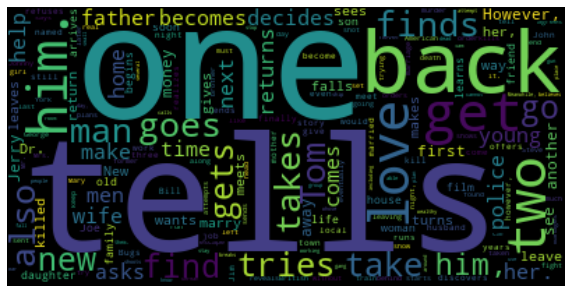

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

freq_dict = {k: v for k, v in freq_dict.items() if k.lower() not in stop_words}
plot_word_cloud(freq_dict)

# Example: Finding Trends in Unstructured Text 

**Dataset:** Please use the partial dataset or the full dataset depending on whether you choose to work on the bonus task.
* [Covid 19 non-medical news (partial)](https://drive.google.com/file/d/1Hcpiqw1OQaRTBPG-RpfW5ueaWRO4k9yW/view?usp=sharing)
* [Covid 19 non-medical news (full)](https://drive.google.com/file/d/1H6EImMCV1ro3xKKlyzLCaI6WMSNdW3Xg/view?usp=sharing)

Now the steps:
- **Task1**: Extract and place each news article found in [Covid 19 non-medical news (partial)](https://drive.google.com/file/d/1Hcpiqw1OQaRTBPG-RpfW5ueaWRO4k9yW/view?usp=sharing) (ie, each row in the csv file) into 6 buckets or bins based on the `date` column listed below. These 6 bins will correspond to a fixed time interval (roughly 2 months). 
  - 01-01 - 02-29
  - 03-01 - 04-30
  - 05-01 - 06-30
  - 07-01 - 08-31
  - 09-01 - 10-31
  - 11-01 - 11-27

- **Task2**: For each bin generate a word cloud using the text found in `title` column. Be sure to remove the stop words as described in the practice problems.

- **Task3**: Do the same (ie Task 2) for the `title` column in the [Covid 19 non-medical news (full)](https://drive.google.com/file/d/1H6EImMCV1ro3xKKlyzLCaI6WMSNdW3Xg/view?usp=sharing) dataset.

- **Task 4**: Do the same (ie Task 2) for the `content` column. This column will only be found in the [Covid 19 non-medical news (full)](https://drive.google.com/file/d/1H6EImMCV1ro3xKKlyzLCaI6WMSNdW3Xg/view?usp=sharing) dataset.

- TIP: Defining a python method for solving Task 2 will make Task 3 and 4 easy!  

Now conduct a brief analysis:
- After Task 2, 3 or 4, describe how the most frequent words (as visualized in the word cloud) changes over the course of the year. Do you spot any interesting patterns. 


In [ ]:
# Task 1. Extract and place each news article found in Covid 19 non-medical news
# (partial) (ie, each row in the csv file) into 6 buckets or bins based on the
# date column listed below. These 6 bins will correspond to a fixed time 
# interval (roughly 2 months). 

# import file
import pandas as pd
covid_part = pd.read_csv("./sample_data/covid19_non_medical_news_partial.csv")

# Divide into 6 bins
covid1 = covid_part[(covid_part.date < "2020-03-01")]
covid2 = covid_part[(covid_part.date >= "2020-03-01") & (covid_part.date < "2020-05-01")]
covid3 = covid_part[(covid_part.date >= "2020-05-01") & (covid_part.date < "2020-07-01")]
covid4 = covid_part[(covid_part.date >= "2020-07-01") & (covid_part.date < "2020-09-01")]
covid5 = covid_part[(covid_part.date >= "2020-09-01") & (covid_part.date < "2020-11-01")]
covid6 = covid_part[(covid_part.date >= "2020-11-01")]

covid_part.head()


,author,crawled_time,date,domain,title,url,topic_area
0,Thomas Hughes,2020-05-19,2020-01-02,marketbeat,Three Industrial Giants You Should Own In 2020,https://www.marketbeat.com/originals/three-ind...,business
1,Steve Anderson,2020-05-19,2020-01-03,marketbeat,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",https://www.marketbeat.com/originals/teal-brea...,business
2,Thomas Hughes,2020-05-19,2020-01-06,marketbeat,Cal-Maine Just Shed 12% - But Is Now The Time ...,https://www.marketbeat.com/originals/cal-maine...,business
3,Steve Anderson,2020-05-19,2020-01-08,marketbeat,Tesla (TSLA) Now Bigger Than Ford (F) in Terms...,https://www.marketbeat.com/originals/tesla-now...,business
4,Reuters,2020-04-19,2020-01-08,theguardian,China pneumonia outbreak may be caused by Sars...,https://www.theguardian.com/science/2020/jan/0...,general


In [ ]:
# Task 2. For each bin generate a word cloud using the text found in title 
# column. Be sure to remove the stop words as described in the practice problems.

# Define function to break it into words
def split_to_words(text):
    import itertools as it

    # break into words.
    text = [plot.split(" ") for plot in text]

    # we want a single list of words
    word_list = list(it.chain.from_iterable(text))

    return word_list

# define function to create dict of word frequencies, removing stop words
def dict_word_freq(word_list):
    # prepare to remove stop words
    from nltk.corpus import stopwords
    import nltk
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

    # create an empty dictionary.
    freq_dict = {}

    # clean words then create dictionary with frequency counts
    for word in word_list:
        # clean word
        word = word.replace('.','').replace('!','').replace(',','')
        word = word.replace('?','').replace(':','').replace('-','')
        word = word.replace('\'s','').replace('&','')
        # make it lowercase
        word = word.lower()

        # add or increment word in dict if not a stop word
        if word not in stop_words:
            if word not in freq_dict:
                freq_dict[word] = 0

            freq_dict[word] += 1

    return freq_dict

# define function to plot the wordcloud
def plot_word_cloud(freq_dict):
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt

    wc = WordCloud(background_color="black")
    wc.generate_from_frequencies(freq_dict)
    plt.figure(figsize=(10,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# define function for full process
def create_word_cloud(text):
    # split list into words
    word_list = split_to_words(text)
    # create frequency dict of words
    freq_dict = dict_word_freq(word_list)
    # plot the wordcloud
    plot_word_cloud(freq_dict)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


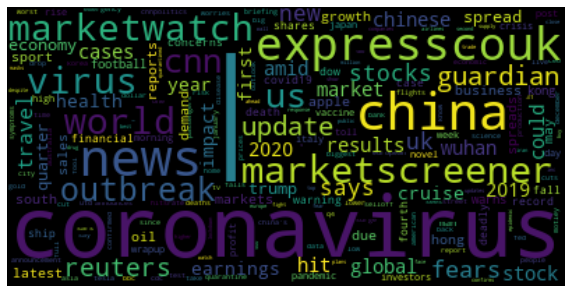

In [ ]:
# create word cloud for covid1
# change to list
text = covid1['title'].values.tolist()
# call function
create_word_cloud(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


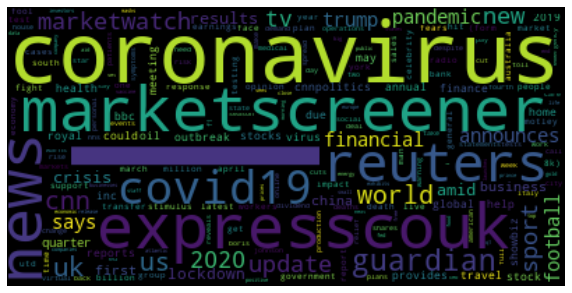

In [ ]:
# create word cloud for covid2
# change to list
text = covid2['title'].values.tolist()
# call function
create_word_cloud(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


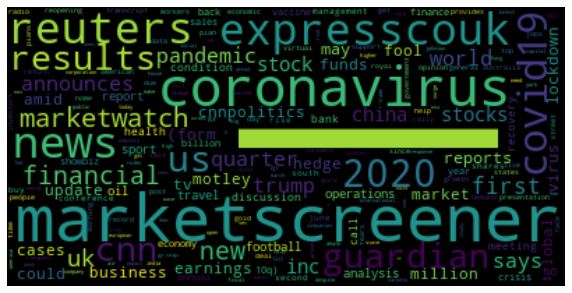

In [ ]:
# create word cloud for covid3
# change to list
text = covid3['title'].values.tolist()
# call function
create_word_cloud(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


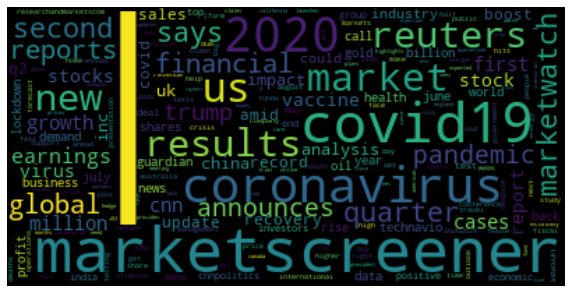

In [ ]:
# create word cloud for covid4
# change to list
text = covid4['title'].values.tolist()
# call function
create_word_cloud(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


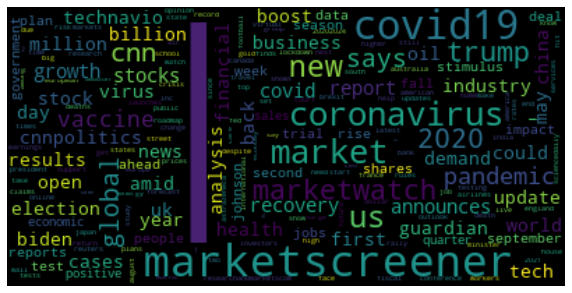

In [ ]:
# create word cloud for covid5
# change to list
text = covid5['title'].values.tolist()
# call function
create_word_cloud(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


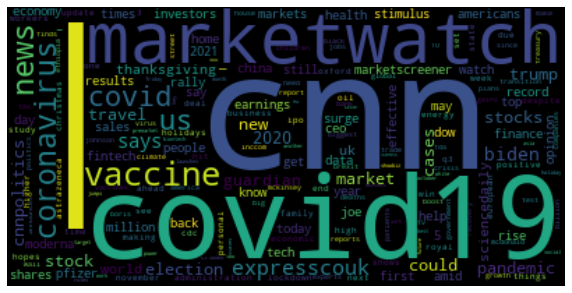

In [ ]:
# create word cloud for covid6
# change to list
text = covid6['title'].values.tolist()
# call function
create_word_cloud(text)

In [ ]:
# Task 3. Do the same (ie Task 2) for the title column in the Covid 19 
# non-medical news (full) dataset.

# import file
import pandas as pd
# covid_full = pd.read_csv("./sample_data/covid19_non_medical_news_full.csv")

# create word cloud for title
# change to list
# text = covid_full['title'].values.tolist()
# call function
# create_word_cloud(text)

In [ ]:
# Task 4. Do the same (ie Task 2) for the content column. This column will 
# only be found in the Covid 19 non-medical news (full) dataset.

# import file
import pandas as pd
# covid_full = pd.read_csv("./sample_data/covid19_non_medical_news_full.csv")

# create a bin to test since full file takes too much RAM
# covid_full = covid_full[(covid_full.date < "2020-03-01")]

# create word cloud for title
# change to list
# text = covid_full['content'].values.tolist()
# call function
# create_word_cloud(text)